# **Data Extraction via API**

In [2]:
from cryptocompare_files.blockchain_data import get_blockchain_data
from cryptocompare_files.ohlcv import get_ohlcv
import pandas as pd

fsyms = ['ETH', 'BTC', 'DOGE', 'MATIC']

# Collect data
ohlcv_data = pd.DataFrame()
blockchain_data = pd.DataFrame()

for fsym in fsyms:
    ohlcv_data_temp = get_ohlcv(fsym)
    ohlcv_data_temp['symbol'] = fsym
    ohlcv_data = pd.concat([ohlcv_data, ohlcv_data_temp])

    blockchain_data_temp = get_blockchain_data(fsym)
    blockchain_data = pd.concat([blockchain_data, blockchain_data_temp])

ohlcv_data = ohlcv_data.reset_index().drop(columns=['index'])

# Save into csv
blockchain_data.to_csv('data/blockchain_data.csv')
ohlcv_data.to_csv('data/ohlcv_data.csv')


---- Extracting price data for ETH ... ---- 

Run number: 1 

Response received
Date range: From 2017-02-24 00:00:00 To 2022-08-17 01:00:00
Run number: 2 

Response received
Date range: From 2011-09-04 01:00:00 To 2017-02-24 00:00:00
No more data received. Terminating the loop at run 2 

---- Extracting blockchain data for ETH ... ---- 

Run number: 1 

Response received
Date range: From 2017-02-24 00:00:00 To 2022-08-17 01:00:00
Run number: 2 

Response received
Date range: From 2011-09-04 01:00:00 To 2017-02-24 00:00:00
Run number: 3 

No more data received. Terminating the loop at run 3 

---- Extracting price data for BTC ... ---- 

Run number: 1 

Response received
Date range: From 2017-02-24 00:00:00 To 2022-08-17 01:00:00
Run number: 2 

Response received
Date range: From 2011-09-04 01:00:00 To 2017-02-24 00:00:00
Run number: 3 

Response received
Date range: From 2006-03-14 00:00:00 To 2011-09-04 01:00:00
No more data received. Terminating the loop at run 3 

---- Extracting bl

# **Feature Engineering and Feature Selection**

## Load data from CSV file

In [58]:
import pandas as pd

blockchain_data = pd.read_csv('data/blockchain_data.csv')
blockchain_data = blockchain_data.drop(columns=['Unnamed: 0', 'index', 'id'])
blockchain_data = blockchain_data.drop_duplicates(subset=['date', 'symbol'], keep='first')

ohlcv_data = pd.read_csv('data/ohlcv_data.csv')
ohlcv_data = ohlcv_data.drop(columns=['Unnamed: 0', 'level_0', 'time'])
ohlcv_data = ohlcv_data.drop_duplicates(subset=['date', 'symbol'], keep='first')

google_trends_eth = pd.read_csv('data/Google_Trends_historical_interest.csv')


# # Merge ohlcv and blockhain data
# df = pd.merge(ohlcv_data, blockchain_data, how='inner', on=['date', 'symbol'])


## Build Technical indicators and Target variables

In [59]:
fsyms = ['ETH', 'BTC', 'DOGE', 'MATIC']

from feature_engineering import build_features_TA, build_target

features = build_features_TA(ohlcv_data, fsyms)
outcomes = build_target(ohlcv_data, fsyms)

## Data pre-processing

In [60]:
import datetime

features_eth = features[features['symbol'] == 'ETH']
features_eth = features_eth.drop(columns=['symbol'])
features_eth['date'] = (features_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )
                    

features_doge = features[features['symbol'] == 'DOGE']
features_doge = features_doge.drop(columns=['symbol'])
features_doge['date'] = (features_doge.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )



outcomes_eth = outcomes[outcomes['symbol'] == 'ETH']
outcomes_eth['date'] = outcomes_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )


outcomes_doge = outcomes[outcomes['symbol'] == 'DOGE']
outcomes_doge['date'] = outcomes_doge.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )


features_eth_blockchain = blockchain_data[blockchain_data['symbol'] == 'ETH']

features_eth_blockchain = features_eth_blockchain.drop(columns=['symbol', 'time'])
features_eth_blockchain['date'] = features_eth_blockchain.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )

features_doge_blockchain = blockchain_data[blockchain_data['symbol'] == 'DOGE']
features_doge_blockchain = features_doge_blockchain.drop(columns=['symbol', 'time'])
features_doge_blockchain['date'] = features_doge_blockchain.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )


ohlcv_eth = ohlcv_data[ohlcv_data['symbol'] == 'ETH']

ohlcv_eth['date'] = (ohlcv_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

google_trends_eth['date'] = google_trends_eth['date'].apply( lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M') )

google_trends_eth = google_trends_eth.set_index('date').resample('D').sum()
google_trends_eth = google_trends_eth.reset_index().drop(columns='isPartial')

features_eth = features_eth.set_index('date')
features_eth_blockchain = features_eth_blockchain.set_index('date')
google_trends_eth = google_trends_eth.set_index('date')
outcomes_eth = outcomes_eth.set_index('date')
ohlcv_eth = ohlcv_eth.set_index('date')

# nonnull_dates = outcomes_eth.merge(features_eth, how='inner', on='date').dropna().date
nonnull_index = outcomes_eth.merge(features_eth, how='inner', on='date').dropna().index


# Blockchain data Feature Engineering
cols_remove = ['transaction_count_all_time', 'unique_addresses_all_time', 'zero_balance_addresses_all_time', 'current_supply']

features_eth_blockchain['unique_addresses_pct_change'] = features_eth_blockchain['unique_addresses_all_time'].pct_change(1)
features_eth_blockchain['unique_addresses_diff'] = features_eth_blockchain['unique_addresses_all_time'].diff(1)
features_eth_blockchain['zero_balance_addresses_diff'] = features_eth_blockchain['zero_balance_addresses_all_time'].diff(1)
features_eth_blockchain['zero_balance_addresses_pct_change'] = features_eth_blockchain['zero_balance_addresses_all_time'].pct_change(1)

features_eth_blockchain['current_supply_pct_change'] = features_eth_blockchain['current_supply'].pct_change(1)
features_eth_blockchain['current_supply_diff'] = features_eth_blockchain['current_supply'].diff(1)

features_eth_blockchain['difficulty_pct_change'] = features_eth_blockchain['difficulty'].pct_change(1)

features_eth_blockchain = features_eth_blockchain.drop(columns=cols_remove)

# Remove NaNs
features_eth = features_eth.loc[nonnull_index, :]
features_eth_blockchain = features_eth_blockchain.loc[nonnull_index, :]
google_trends_eth = google_trends_eth.loc[nonnull_index, :]
outcomes_eth = outcomes_eth.loc[nonnull_index, :]
ohlcv_eth = ohlcv_eth.loc[nonnull_index, :]

# Reset indices
features_eth = features_eth.reset_index()
features_eth_blockchain = features_eth_blockchain.reset_index()
google_trends_eth = google_trends_eth.reset_index()
outcomes_eth = outcomes_eth.reset_index()
ohlcv_eth = ohlcv_eth.reset_index()



print(features_eth.shape, features_eth_blockchain.shape, outcomes_eth.shape, google_trends_eth.shape, ohlcv_eth.shape)


C:\Users\yesbo\AppData\Local\Temp\ipykernel_19516\1583870170.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes_eth['date'] = outcomes_eth.date.apply(
C:\Users\yesbo\AppData\Local\Temp\ipykernel_19516\1583870170.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv_eth['date'] = (ohlcv_eth.date.apply(


(2501, 32) (2501, 18) (2501, 16) (2501, 3) (2501, 10)


## Plotting Technical Indicators

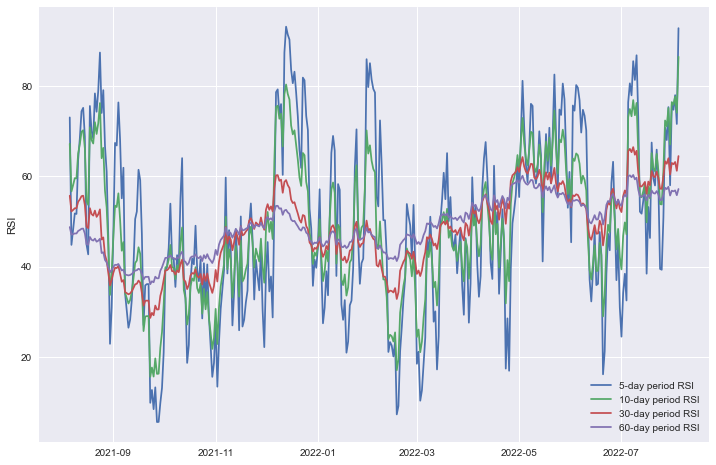

KeyError: 'ADI'

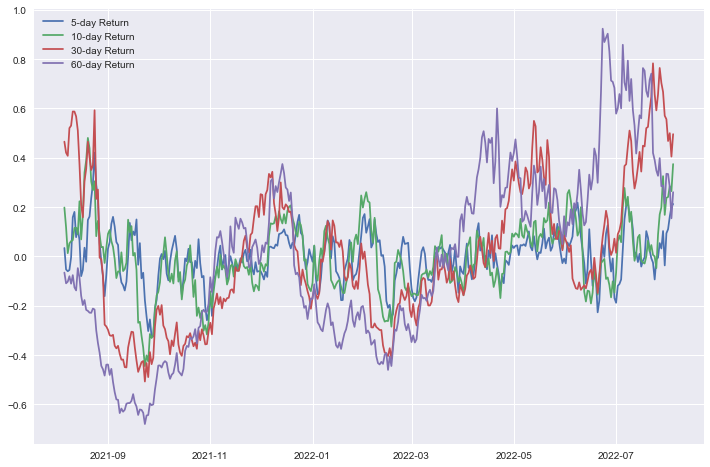

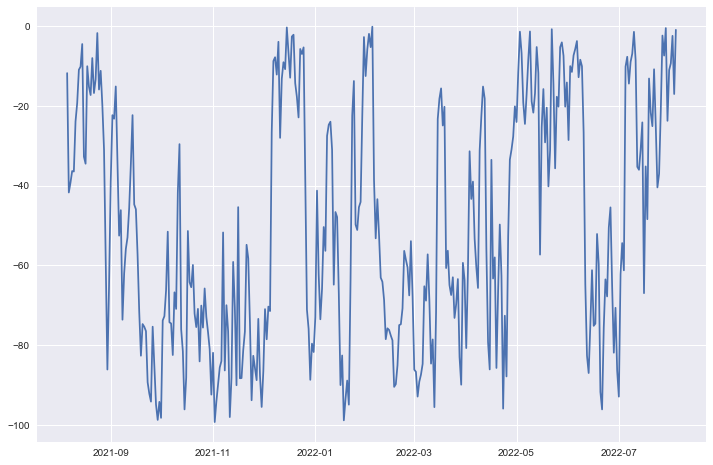

<Figure size 864x576 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
for i in [5, 10, 30, 60]:
    plt.plot(features_eth['date'][-365:-1], features_eth[f'rsi_{i}'][:-365:-1], label=f'{i}-day period RSI')
plt.legend()
plt.ylabel('RSI')
plt.show()

plt.figure(figsize=(12, 8))
for i in [5, 10, 30, 60]:
    plt.plot(features_eth['date'][-365:-1], features_eth[f'return_{i}'][:-365:-1], label=f'{i}-day Return')
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(features_eth['date'][-365:-1], features_eth['WILLR'][:-365:-1], label='Williams %R')

plt.figure(figsize=(12, 8))
plt.plot(features_eth['date'][-365:-1], features_eth['ADI'][:-365:-1], label='ADI')

# plt.legend()
# features_eth

# Exploratory Data Analysis

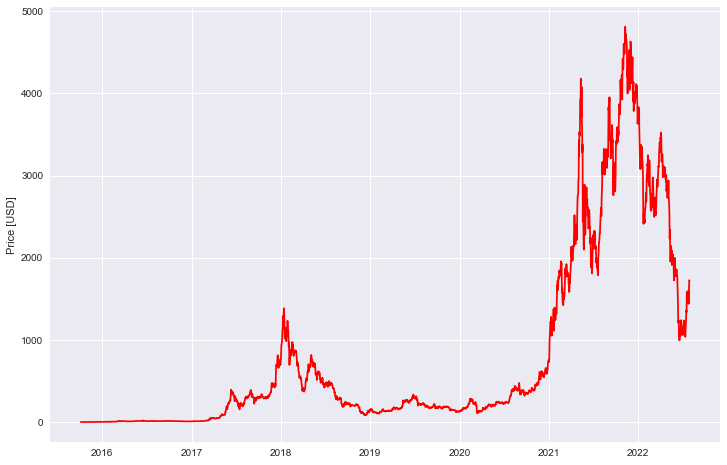

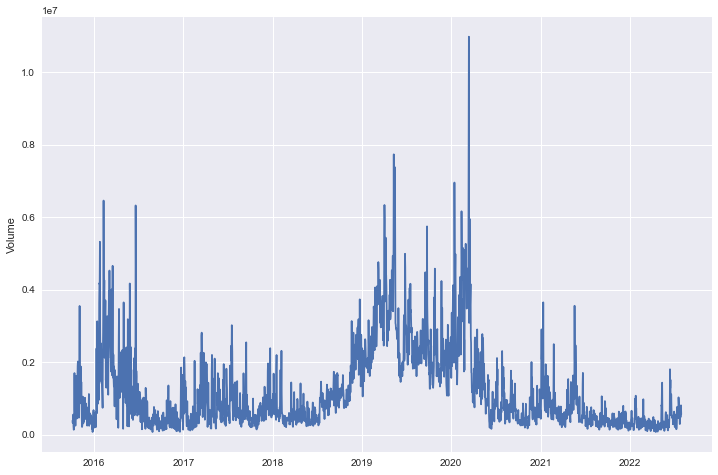

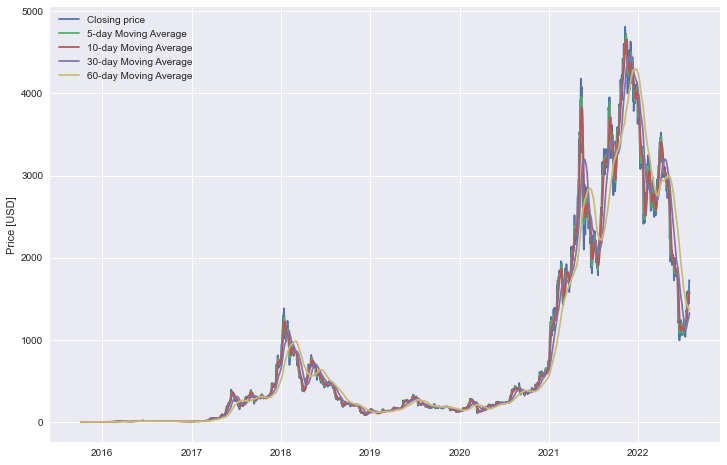

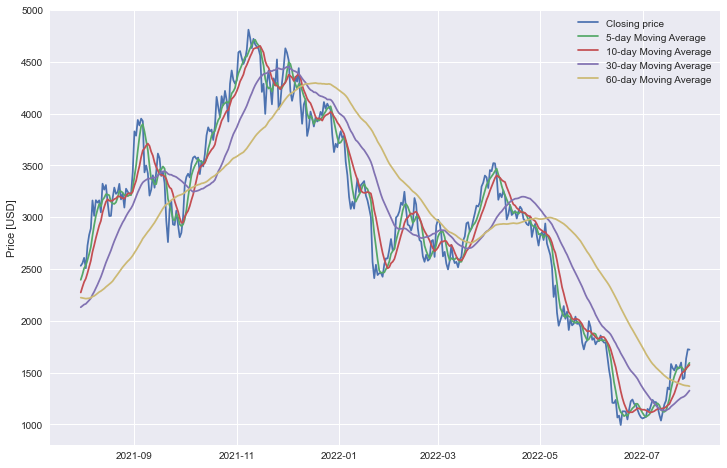

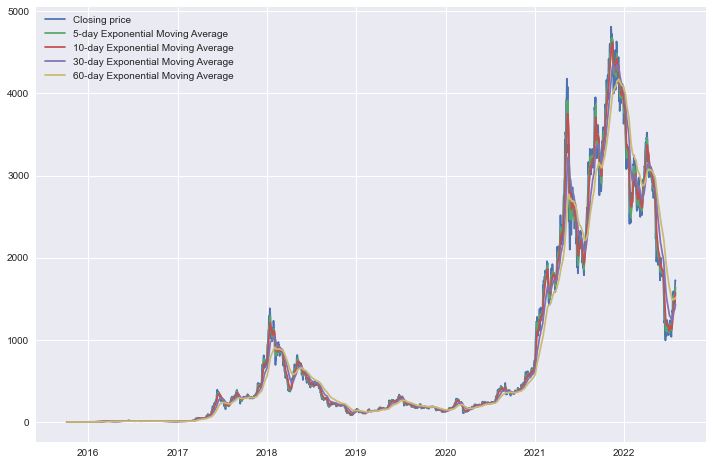

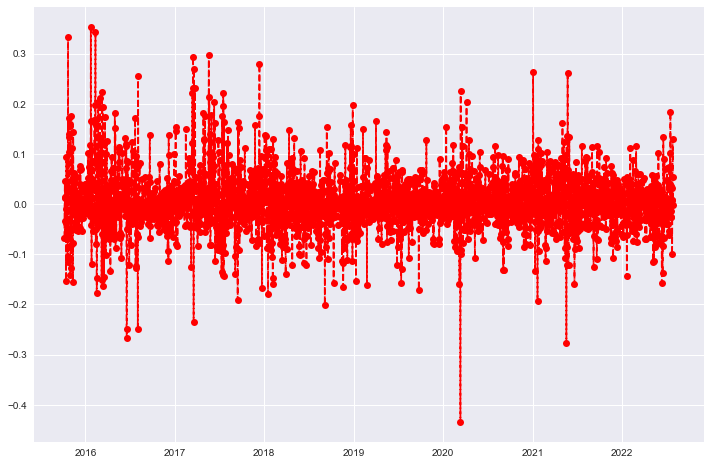

d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


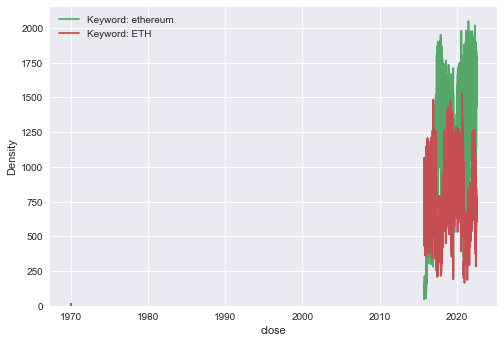

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
plt.plot(ohlcv_eth['date'], ohlcv_eth['close'], color='red')
plt.ylabel('Price [USD]')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(ohlcv_eth['date'], ohlcv_eth['volumefrom'])
plt.ylabel('Volume')

plt.figure(figsize=(12, 8))
plt.plot(ohlcv_eth['date'], ohlcv_eth['close'], label = 'Closing price')
plt.plot(ohlcv_eth['date'], features_eth['sma_5'], label='5-day Moving Average')
plt.plot(ohlcv_eth['date'], features_eth['sma_10'], label='10-day Moving Average')
plt.plot(ohlcv_eth['date'], features_eth['sma_30'], label='30-day Moving Average')
plt.plot(ohlcv_eth['date'], features_eth['sma_60'], label='60-day Moving Average')
plt.ylabel('Price [USD]')
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(ohlcv_eth[:-365:-1]['date'], ohlcv_eth[:-365:-1]['close'], label = 'Closing price')
plt.plot(ohlcv_eth[:-365:-1]['date'], features_eth[:-365:-1]['sma_5'], label='5-day Moving Average')
plt.plot(ohlcv_eth[:-365:-1]['date'], features_eth[:-365:-1]['sma_10'], label='10-day Moving Average')
plt.plot(ohlcv_eth[:-365:-1]['date'], features_eth[:-365:-1]['sma_30'], label='30-day Moving Average')
plt.plot(ohlcv_eth[:-365:-1]['date'], features_eth[:-365:-1]['sma_60'], label='60-day Moving Average')
plt.ylabel('Price [USD]')
plt.legend()



plt.figure(figsize=(12, 8))
plt.plot(ohlcv_eth['date'], ohlcv_eth['close'], label = 'Closing price')
plt.plot(ohlcv_eth['date'], features_eth['ema_5'], label='5-day Exponential Moving Average')
plt.plot(ohlcv_eth['date'], features_eth['ema_10'], label='10-day Exponential Moving Average')
plt.plot(ohlcv_eth['date'], features_eth['ema_30'], label='30-day Exponential Moving Average')
plt.plot(ohlcv_eth['date'], features_eth['ema_60'], label='60-day Exponential Moving Average')
plt.legend()


plt.figure(figsize=(12, 8))
plt.plot(ohlcv_eth['date'], ohlcv_eth['close'].pct_change(), label = 'Daily return', color = 'red', linestyle='--', marker='o')
plt.show()
plt.xlabel('Daily return')

sns.distplot(ohlcv_eth['close'].pct_change())



## Blockchain data

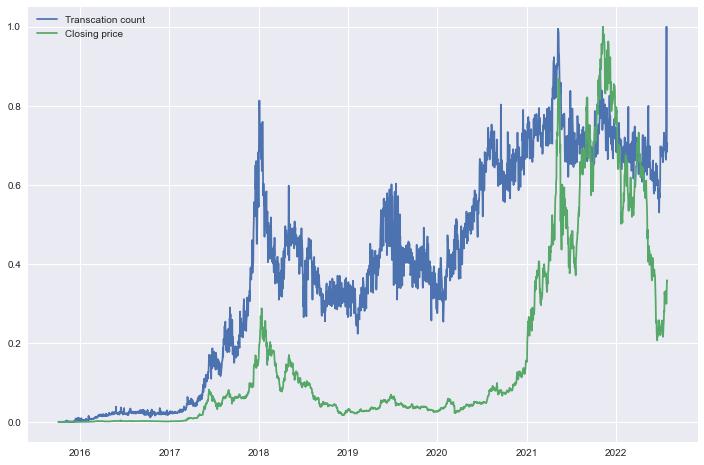

In [65]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

import scipy 

scaler = MinMaxScaler()

plt.figure(figsize=(12, 8))

plt.plot(features_eth_blockchain['date'], scaler.fit_transform(features_eth_blockchain['transaction_count'].values.reshape(-1, 1)) , label='Transcation count')
plt.plot(features_eth_blockchain['date'], scaler.fit_transform(ohlcv_eth['close'].values.reshape(-1, 1)), label='Closing price')
plt.legend()

# plt.plot(features_eth_blockchain['date'], features_eth_blockchain['active_addresses'], label=' transaction count')



In [43]:
features_eth_blockchain


date  zero_balance_addresses_all_time  unique_addresses_all_time  \
0    2015-10-06                             3755                      23953   
1    2015-10-07                             3767                      24048   
2    2015-10-08                             3787                      24114   
3    2015-10-09                             3803                      24188   
4    2015-10-10                             3820                      24248   
...         ...                              ...                        ...   
2484 2022-07-25                        144897712                  224054199   
2485 2022-07-26                        144917617                  224137991   
2486 2022-07-27                        144952003                  224239225   
2487 2022-07-28                        144988848                  224317261   
2488 2022-07-29                        145057676                  224391484   

      new_addresses  active_addresses  transaction_count  \
0                95              1554               6456   
1                95              1511               7113   
2                66              1459               6926   
3                74              1489               6761   
4                60              1407               6529   
...             ...               ...                ...   
2484          76791            642692            1234425   
2485          83792           1098039            1640575   
2486         101234            569458            1161419   
2487          78036            537496            1122646   
2488          74223            563903            1159474   

      transaction_count_all_time  large_transaction_count  \
0                         296291                        0   
1                         303404                        0   
2                         310330                        0   
3                         317091                        0   
4                         323620                        0   
...                          ...                      ...   
2484                  1601894837                     3449   
2485                  1603535412                     3519   
2486                  1604696831                     4023   
2487                  1605819477                     5547   
2488                  1606978951                     4551   

      average_transaction_value  block_height    hashrate    difficulty  \
0                     78.481683      344703.0    0.349125  6.276470e+12   
1                     43.614287      349707.0    0.346501  5.983538e+12   
2                     45.260881      354859.0    0.356495  5.977784e+12   
3                     33.183753      359764.0    0.347613  6.122632e+12   
4                     19.715809      364660.0    0.341791  6.031582e+12   
...                         ...           ...         ...           ...   
2484                   2.164470    15214807.0  872.199982  1.178479e+16   
2485                   1.610106    15221187.0  873.683394  1.183260e+16   
2486                   2.822379    15227620.0  879.212611  1.180882e+16   
2487                   3.238220    15234058.0  894.239719  1.199993e+16   
2488                   2.699566    15240481.0  872.138310  1.173014e+16   

      block_time  block_size  current_supply  
0      17.977732       781.0    7.382568e+07  
1      17.268439       808.0    7.385181e+07  
2      16.768200       788.0    7.387859e+07  
3      17.613377       779.0    7.390404e+07  
4      17.646987       777.0    7.392954e+07  
...          ...         ...             ...  
2484   13.511573     86433.0    1.216982e+08  
2485   13.543345     84632.0    1.217116e+08  
2486   13.431126     81309.0    1.217251e+08  
2487   13.419139     84234.0    1.217387e+08  
2488   13.449860     83336.0    1.217521e+08  

[2489 rows x 15 columns]

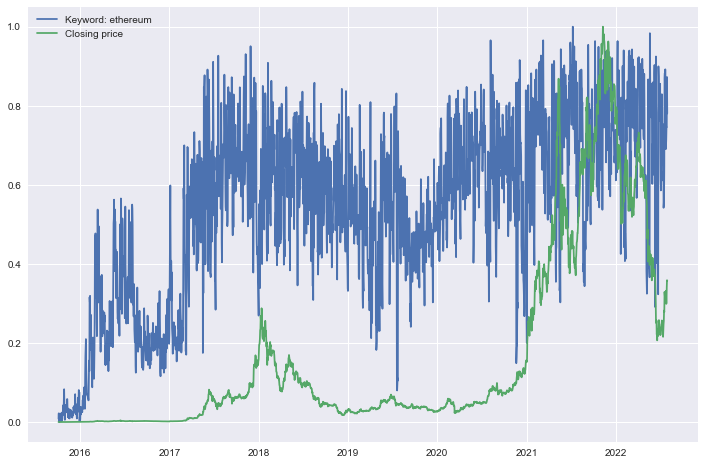

(-0.1, 0.1)

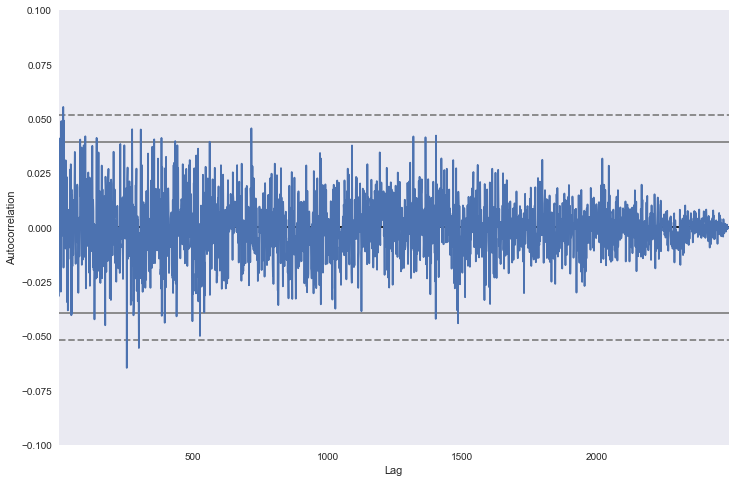

In [40]:
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

import scipy 

scaler = MinMaxScaler()

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

plt.plot(google_trends_eth['date'], scaler.fit_transform(google_trends_eth['ethereum'].values.reshape(-1, 1)) , label='Keyword: ethereum')
# plt.plot(google_trends_eth['date'], scaler.fit_transform(google_trends_eth['ETH'].values.reshape(-1, 1)), label='Keyword: ETH')
plt.plot(ohlcv_eth['date'], scaler.fit_transform(ohlcv_eth['close'].values.reshape(-1, 1)), label='Closing price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
autocorrelation_plot(outcomes_eth['close_1'])
plt.ylim(-0.1, 0.1)

# # T-test
# scipy.stats.ttest_ind(google_trends_eth['ethereum'], outcomes_eth['close_1'])

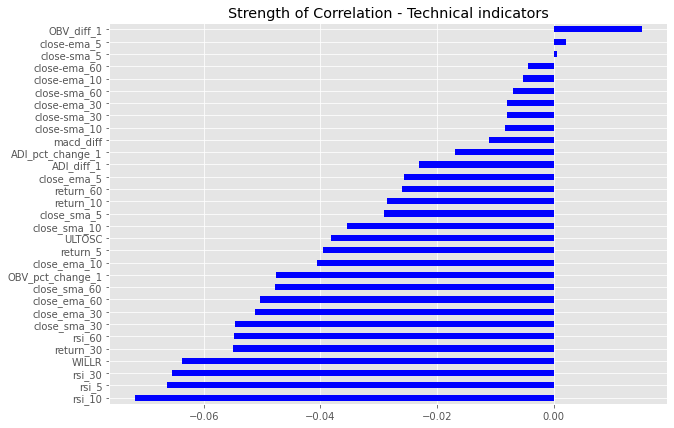

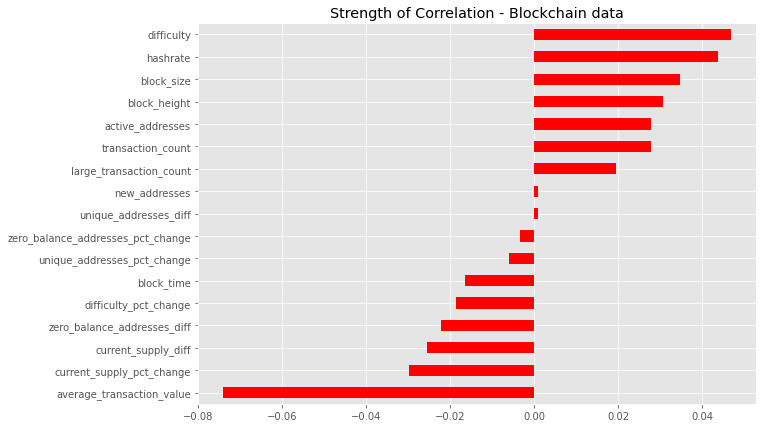

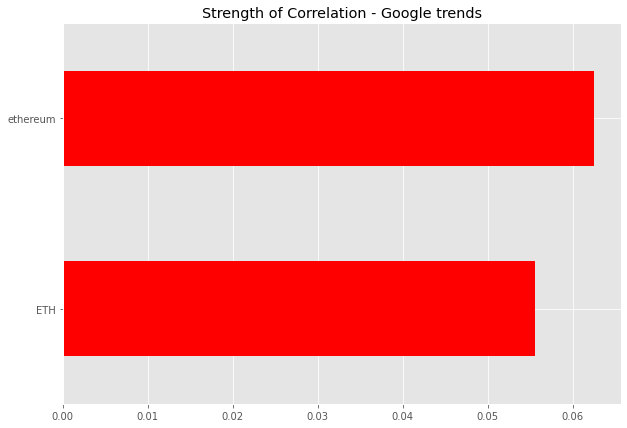

In [5]:
import matplotlib.pyplot as plt

# Correlation strength
plt.style.use('ggplot')

plt.figure(figsize=(10,7))

corr = features_eth.corrwith(outcomes_eth['close_1'])
corr.sort_values().plot.barh(color = 'blue', title = 'Strength of Correlation - Technical indicators')
plt.show()

plt.figure(figsize=(10,7))
plt.style.use('ggplot')
corr = features_eth_blockchain.corrwith(outcomes_eth['close_1'])
corr.sort_values().plot.barh(color = 'red', title = 'Strength of Correlation - Blockchain data')
plt.show()

plt.figure(figsize=(10,7))

plt.style.use('ggplot')
corr = google_trends_eth.corrwith(outcomes_eth['close_1'])
corr.sort_values().plot.barh(color = 'red', title = 'Strength of Correlation - Google trends')
plt.show()

Index(['date', 'return_5', 'close_sma_5', 'close_ema_5', 'return_10',
       'close_sma_10', 'close_ema_10', 'return_30', 'close_sma_30',
       'close_ema_30', 'return_60', 'close_sma_60', 'close_ema_60', 'rsi_5',
       'rsi_10', 'rsi_30', 'rsi_60', 'macd_diff', 'OBV', 'ADI', 'WILLR',
       'ULTOSC'],
      dtype='object')

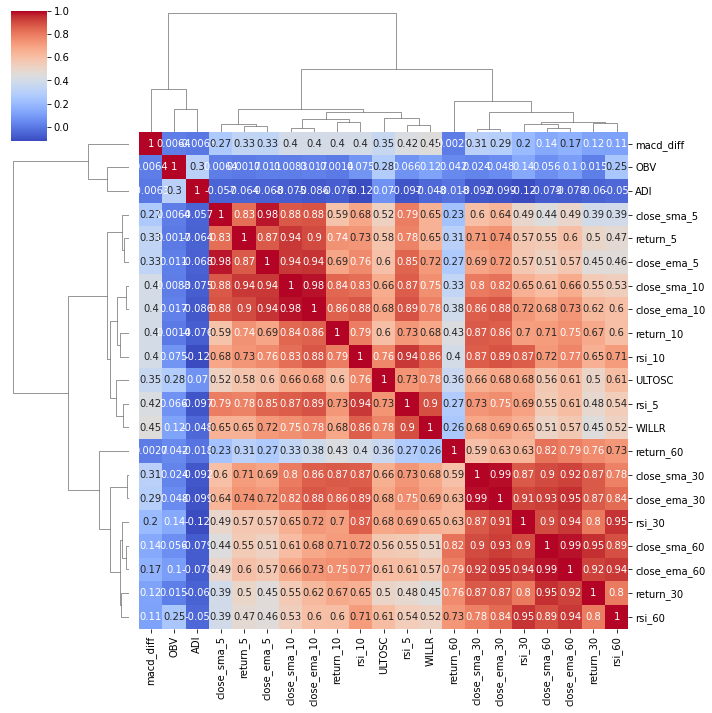

In [23]:
import seaborn as sns
from collinearity import SelectNonCollinear

#  Multicoliniarity

sns.clustermap(features_eth.drop(columns='date').corr(), cmap='coolwarm', annot=True, method='ward')




In [5]:
outcomes_eth

date symbol   close_1  direction_1   close_2  direction_2  \
0    2015-10-06    ETH  0.071779          1.0  0.056406          1.0   
1    2015-10-07    ETH -0.014343          0.0 -0.057482          0.0   
2    2015-10-08    ETH -0.043766          0.0 -0.010209          0.0   
3    2015-10-09    ETH  0.035093          1.0  0.023179          1.0   
4    2015-10-10    ETH -0.011511          0.0 -0.000797          0.0   
...         ...    ...       ...          ...       ...          ...   
2491 2022-08-01    ETH -0.000300          0.0  0.007376          1.0   
2492 2022-08-02    ETH  0.007679          1.0  0.014397          1.0   
2493 2022-08-03    ETH  0.006667          1.0 -0.067999          0.0   
2494 2022-08-04    ETH -0.074172          0.0 -0.048921          0.0   
2495 2022-08-05    ETH  0.027273          1.0  0.021311          1.0   

       close_3  direction_3   close_4  direction_4   close_5  direction_5  \
0     0.010171          1.0  0.045621          1.0  0.033586          1.0   
1    -0.024406          0.0 -0.035635          0.0 -0.025183          0.0   
2    -0.021602          0.0 -0.010998          0.0  0.028510          1.0   
3     0.034268          1.0  0.075584          1.0  0.269366          1.0   
4     0.039118          1.0  0.226330          1.0  0.121467          1.0   
...        ...          ...       ...          ...       ...          ...   
2491  0.014092          1.0 -0.061125          0.0 -0.035518          0.0   
2492 -0.060842          0.0 -0.035229          0.0 -0.040828          0.0   
2493 -0.042581          0.0 -0.048138          0.0 -0.089601          0.0   
2494 -0.054442          0.0 -0.095630          0.0 -0.056035          0.0   
2495 -0.023178          0.0  0.019590          1.0 -0.063251          0.0   

       close_6  direction_6   close_7  direction_7  
0     0.044788          1.0  0.086524          1.0  
1     0.013758          1.0  0.196401          1.0  
2     0.213811          1.0  0.110018          1.0  
3     0.160823          1.0  0.220196          1.0  
4     0.178827          1.0  0.145651          1.0  
...        ...          ...       ...          ...  
2491 -0.041116          0.0 -0.082886          0.0  
2492 -0.082610          0.0 -0.042444          0.0  
2493 -0.049741          0.0 -0.126949          0.0  
2494 -0.132731          0.0 -0.145184          0.0  
2495 -0.076701          0.0 -0.113553          0.0  

[2496 rows x 16 columns]

# **Prediction models**

## *Construct datasets*

In [75]:
dataset_1 = features_eth
dataset_2 = features_eth_blockchain
dataset_3 = google_trends_eth
dataset_4 = features_eth.merge(features_eth_blockchain)
dataset_5 = dataset_4.merge(google_trends_eth)

## Baseline model (Momentum)

In [6]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

ohlcv_eth['direction_past_1'] = ohlcv_eth['close'].pct_change(1).apply(lambda x: 1 if x > 0 else (0 if x < 0 else None))
momentum_preds = ohlcv_eth.shift(1)[['date', 'direction_past_1']].set_index('date')
momentum_preds = momentum_preds.dropna()
y_true = outcomes_eth.set_index('date').loc[momentum_preds.index]['direction_1']

# accuracy_score(y_true, momentum_preds['direction_past_1'])

print('Accuracy:', round(accuracy_score(y_true, momentum_preds), 3))
print('F1 score:', round(f1_score(y_true, momentum_preds), 3))
print('Recall:', round(recall_score(y_true, momentum_preds), 3))
print('Precision:', round(precision_score(y_true, momentum_preds), 3))

# movements

Accuracy: 0.533
F1 score: 0.532
Recall: 0.544
Precision: 0.52


### *Run Predictions*


**List of models:**
- *Logistic Regression*
- *Support Vector Machines*
- *XGBoost Classifier*


## Dataset 1: Technical Indicators

In [5]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time
import logging

# Configure logging
logging.basicConfig(filename='training_models_d1.log',
                    filemode='a',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

train_periods = [30, 60, 100, 200]
test_periods = [1, 3, 7, 14]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
        
        logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
        
        for model in models:
            start = time.time()
            
            logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            logging.info('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], dataset_1, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
            
            end = time.time()

            logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('metrics_dataset1_15Aug.csv')
pd.DataFrame(train_accuracies).to_csv('train_accuracies_dataset1_15Aug.csv')


Train period: 30	 Test period: 1	 Model: Logistic Regression

Train period: 30	 Test period: 1	 Model: Support Vector Machines

Train period: 30	 Test period: 1	 Model: XGBoost Classifier

Train period: 30	 Test period: 3	 Model: Logistic Regression

Train period: 30	 Test period: 3	 Model: Support Vector Machines

Train period: 30	 Test period: 3	 Model: XGBoost Classifier

Train period: 30	 Test period: 7	 Model: Logistic Regression

Train period: 30	 Test period: 7	 Model: Support Vector Machines

Train period: 30	 Test period: 7	 Model: XGBoost Classifier

Train period: 30	 Test period: 14	 Model: Logistic Regression

Train period: 30	 Test period: 14	 Model: Support Vector Machines

Train period: 30	 Test period: 14	 Model: XGBoost Classifier

Train period: 60	 Test period: 1	 Model: Logistic Regression

Train period: 60	 Test period: 1	 Model: Support Vector Machines

Train period: 60	 Test period: 1	 Model: XGBoost Classifier

Train period: 60	 Test period: 3	 Model: Logistic Re

In [78]:
outcomes_eth, ohlcv_eth

(           date   close_1  direction_1
 0    2015-10-05 -0.040885          0.0
 1    2015-10-06  0.071779          1.0
 2    2015-10-07 -0.014343          0.0
 3    2015-10-08 -0.043766          0.0
 4    2015-10-09  0.035093          1.0
 ...         ...       ...          ...
 2497 2022-08-06 -0.005804          0.0
 2498 2022-08-07 -0.043560          0.0
 2499 2022-08-08  0.043783          1.0
 2500 2022-08-09 -0.081249          0.0
 2501 2022-08-10       NaN          NaN
 
 [2502 rows x 3 columns],
            date       high        low       open  volumefrom      volumeto  \
 0    2015-10-05     0.6883     0.6189     0.6661   331312.10  2.083001e+05   
 1    2015-10-06     0.6587     0.6016     0.6287   385789.87  2.528740e+05   
 2    2015-10-07     0.6590     0.5955     0.6555   319267.37  1.952578e+05   
 3    2015-10-08     0.6419     0.5851     0.6116   473726.57  2.939566e+05   
 4    2015-10-09     0.6955     0.6238     0.6205   553115.65  3.589180e+05   
 ...         ...  

## Dataset 2: Blockchain Data

In [5]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import logging

# Configure logging
logging.basicConfig(filename='training_models_d2.log',
                    filemode='a',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

train_periods = [30, 60, 100, 200]
test_periods = [1, 3, 7, 14]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
        
        logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
        
        for model in models:
            start = time.time()
            
            logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            logging.info('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], dataset_2, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
            
            end = time.time()

            logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('metrics_dataset2.csv')
pd.DataFrame(train_accuracies).to_csv('evaluation_metrics/train_accuracies_d2.csv')

Train period: 30	 Test period: 1	 Model: Logistic Regression

Train period: 30	 Test period: 1	 Model: Support Vector Machines

Train period: 30	 Test period: 1	 Model: XGBoost Classifier

Train period: 30	 Test period: 3	 Model: Logistic Regression

Train period: 30	 Test period: 3	 Model: Support Vector Machines

Train period: 30	 Test period: 3	 Model: XGBoost Classifier

Train period: 30	 Test period: 7	 Model: Logistic Regression

Train period: 30	 Test period: 7	 Model: Support Vector Machines

Train period: 30	 Test period: 7	 Model: XGBoost Classifier

Train period: 30	 Test period: 14	 Model: Logistic Regression

Train period: 30	 Test period: 14	 Model: Support Vector Machines

Train period: 30	 Test period: 14	 Model: XGBoost Classifier

Train period: 60	 Test period: 1	 Model: Logistic Regression

Train period: 60	 Test period: 1	 Model: Support Vector Machines

Train period: 60	 Test period: 1	 Model: XGBoost Classifier

Train period: 60	 Test period: 3	 Model: Logistic Re

## Dataset 3: Google Trends

In [11]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import logging

# Configure logging
logging.basicConfig(filename='training_models_d3.log',
                    filemode='a',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

train_periods = [30, 60, 100, 200]
test_periods = [1, 3, 7, 14]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
        
        logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
        
        for model in models:
            start = time.time()
            
            logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            logging.info('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], dataset_3, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
            
            end = time.time()

            logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('evaluation_metrics/metrics_dataset3.csv')
pd.DataFrame(train_accuracies).to_csv('evaluation_metrics/train_accuracies_d3.csv')

Train period: 30	 Test period: 1	 Model: Logistic Regression

Train period: 30	 Test period: 1	 Model: Support Vector Machines

Train period: 30	 Test period: 1	 Model: XGBoost Classifier

Train period: 30	 Test period: 3	 Model: Logistic Regression

Train period: 30	 Test period: 3	 Model: Support Vector Machines

Train period: 30	 Test period: 3	 Model: XGBoost Classifier

Train period: 30	 Test period: 7	 Model: Logistic Regression

Train period: 30	 Test period: 7	 Model: Support Vector Machines

Train period: 30	 Test period: 7	 Model: XGBoost Classifier

Train period: 30	 Test period: 14	 Model: Logistic Regression

Train period: 30	 Test period: 14	 Model: Support Vector Machines

Train period: 30	 Test period: 14	 Model: XGBoost Classifier

Train period: 60	 Test period: 1	 Model: Logistic Regression

Train period: 60	 Test period: 1	 Model: Support Vector Machines

Train period: 60	 Test period: 1	 Model: XGBoost Classifier

Train period: 60	 Test period: 3	 Model: Logistic Re

## Dataset 4: Technical Indicators + On-chain metrics

In [5]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import logging

# Configure logging
logging.basicConfig(filename='training_models_d4.log',
                    filemode='a',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

train_periods = [30, 60, 100, 200]
test_periods = [1, 3, 7, 14]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
        
        logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
        
        for model in models:
            start = time.time()
            
            logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            logging.info('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], dataset_4, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
            
            end = time.time()

            logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('evaluation_metrics/metrics_dataset4.csv')
pd.DataFrame(train_accuracies).to_csv('evaluation_metrics/train_accuracies_d4.csv')

Train period: 30	 Test period: 1	 Model: Logistic Regression

Train period: 30	 Test period: 1	 Model: Support Vector Machines

Train period: 30	 Test period: 1	 Model: XGBoost Classifier

Train period: 30	 Test period: 3	 Model: Logistic Regression

Train period: 30	 Test period: 3	 Model: Support Vector Machines

Train period: 30	 Test period: 3	 Model: XGBoost Classifier

Train period: 30	 Test period: 7	 Model: Logistic Regression

Train period: 30	 Test period: 7	 Model: Support Vector Machines

Train period: 30	 Test period: 7	 Model: XGBoost Classifier

Train period: 30	 Test period: 14	 Model: Logistic Regression

Train period: 30	 Test period: 14	 Model: Support Vector Machines

Train period: 30	 Test period: 14	 Model: XGBoost Classifier

Train period: 60	 Test period: 1	 Model: Logistic Regression

Train period: 60	 Test period: 1	 Model: Support Vector Machines

Train period: 60	 Test period: 1	 Model: XGBoost Classifier

Train period: 60	 Test period: 3	 Model: Logistic Re

## Dataset 5: All features

In [5]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import logging

# Configure logging
logging.basicConfig(filename='training_models_d5.log',
                    filemode='a',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

train_periods = [30, 60, 100, 200]
test_periods = [1, 3, 7, 14]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
        
        logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
        
        for model in models:
            start = time.time()
            
            logging.info('Train period: {train_period}\t Test period: {test_period}\n'.format(train_period=train_period, test_period=test_period))
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            logging.info('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], dataset_5, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
            
            end = time.time()

            logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('evaluation_metrics/metrics_dataset5.csv')
pd.DataFrame(train_accuracies).to_csv('evaluation_metrics/train_accuracies_d5.csv')

Train period: 30	 Test period: 1	 Model: Logistic Regression

Train period: 30	 Test period: 1	 Model: Support Vector Machines

Train period: 30	 Test period: 1	 Model: XGBoost Classifier

Train period: 30	 Test period: 3	 Model: Logistic Regression

Train period: 30	 Test period: 3	 Model: Support Vector Machines

Train period: 30	 Test period: 3	 Model: XGBoost Classifier

Train period: 30	 Test period: 7	 Model: Logistic Regression

Train period: 30	 Test period: 7	 Model: Support Vector Machines

Train period: 30	 Test period: 7	 Model: XGBoost Classifier

Train period: 30	 Test period: 14	 Model: Logistic Regression

Train period: 30	 Test period: 14	 Model: Support Vector Machines

Train period: 30	 Test period: 14	 Model: XGBoost Classifier

Train period: 60	 Test period: 1	 Model: Logistic Regression

Train period: 60	 Test period: 1	 Model: Support Vector Machines

Train period: 60	 Test period: 1	 Model: XGBoost Classifier

Train period: 60	 Test period: 3	 Model: Logistic Re

# Predicting 7-days ahead

In [73]:
import datetime
from feature_engineering_2 import build_features_TA


fsyms = ['ETH', 'BTC', 'DOGE', 'MATIC']
features_2 = build_features_TA(ohlcv_data, fsyms)


features_eth = features_2[features_2['symbol'] == 'ETH']
features_eth = features_eth.drop(columns=['symbol'])
features_eth['date'] = (features_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

features_btc = features_2[features_2['symbol'] == 'BTC']
features_btc = features_btc.drop(columns=['symbol'])
features_btc['date'] = (features_btc.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

outcomes_eth = outcomes[outcomes['symbol'] == 'ETH']
outcomes_eth['date'] = outcomes_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )


ohlcv_eth = ohlcv_data[ohlcv_data['symbol'] == 'ETH']

ohlcv_eth['date'] = (ohlcv_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

features_eth = features_eth.set_index('date')
outcomes_eth = outcomes_eth.set_index('date')
ohlcv_eth = ohlcv_eth.set_index('date')
features_btc = features_btc.set_index('date')


# nonnull_dates = outcomes_eth.merge(features_eth, how='inner', on='date').dropna().date
nonnull_index = outcomes_eth.merge(features_eth, how='inner', on='date').dropna().index


# Remove NaNs
features_eth = features_eth.loc[nonnull_index, :]
outcomes_eth = outcomes_eth.loc[nonnull_index, :]
ohlcv_eth = ohlcv_eth.loc[nonnull_index, :]
features_btc = features_btc.loc[nonnull_index, :]

# Reset indices
features_eth = features_eth.reset_index()
features_btc = features_btc.reset_index()

outcomes_eth = outcomes_eth.reset_index()
ohlcv_eth = ohlcv_eth.reset_index()

print(features_eth.shape, outcomes_eth.shape, ohlcv_eth.shape, features_btc.shape)


d:\UNI\Dissertation\simulations\feature_engineering_2.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features.loc[features['symbol'] == fsym,
d:\UNI\Dissertation\simulations\feature_engineering_2.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features.loc[features['symbol'] == fsym,
d:\UNI\Dissertation\simulations\feature_engineering_2.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

(2502, 455) (2502, 16) (2502, 10) (2502, 455)


C:\Users\yesbo\AppData\Local\Temp\ipykernel_19516\1951761738.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes_eth['date'] = outcomes_eth.date.apply(
C:\Users\yesbo\AppData\Local\Temp\ipykernel_19516\1951761738.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv_eth['date'] = (ohlcv_eth.date.apply(


In [82]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import logging


train_periods = [60, 100, 200]
test_periods = [1, 3, 7]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
        
        
        for model in models:
            start = time.time()
            
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            print('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], dataset_5, outcomes_eth['direction_7'], train_period=train_period, test_period=test_period)
            
            end = time.time()

            print('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('evaluation_metrics/metrics_dataset5_7d.csv')
pd.DataFrame(train_accuracies).to_csv('evaluation_metrics/train_accuracies_d5_7d.csv')

Train period: 60	 Test period: 1	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 60 and test period 1: 149.77749180793762
Train period: 60	 Test period: 1	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 60 and test period 1: 69.67225432395935
Train period: 60	 Test period: 1	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 60 and test period 1: 370.69087433815
Train period: 60	 Test period: 3	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 60 and test period 3: 47.034379720687866
Train period: 60	 Test period: 3	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 60 and test period 3: 24.63256001472473
Train period: 60	 Test period: 3	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 60 and test period 3: 126.88565731048584
Train period: 60	 Test period: 7	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 60 and test period 7: 21.276952266693115
Train period: 60	 Test period: 7	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 60 and test period 7: 9.82621455192566
Train period: 60	 Test period: 7	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 60 and test period 7: 53.01806402206421
Train period: 100	 Test period: 1	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 100 and test period 1: 162.1678774356842
Train period: 100	 Test period: 1	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 100 and test period 1: 83.39758515357971
Train period: 100	 Test period: 1	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 100 and test period 1: 473.591760635376
Train period: 100	 Test period: 3	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 100 and test period 3: 54.50476408004761
Train period: 100	 Test period: 3	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 100 and test period 3: 24.62379479408264
Train period: 100	 Test period: 3	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 100 and test period 3: 164.13724374771118
Train period: 100	 Test period: 7	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 100 and test period 7: 23.503222227096558
Train period: 100	 Test period: 7	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 100 and test period 7: 11.446953773498535
Train period: 100	 Test period: 7	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 100 and test period 7: 70.97166776657104
Train period: 200	 Test period: 1	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 200 and test period 1: 177.77172803878784
Train period: 200	 Test period: 1	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 200 and test period 1: 101.14687895774841
Train period: 200	 Test period: 1	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 200 and test period 1: 734.4940190315247
Train period: 200	 Test period: 3	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 200 and test period 3: 58.750853538513184
Train period: 200	 Test period: 3	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 200 and test period 3: 33.77777457237244
Train period: 200	 Test period: 3	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 200 and test period 3: 242.3407757282257
Train period: 200	 Test period: 7	 Model: Logistic Regression

Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Time taken to train model Logistic Regression for train period 200 and test period 7: 24.007010221481323
Train period: 200	 Test period: 7	 Model: Support Vector Machines

Running predictions for Support Vector Machines
Time taken to train model Support Vector Machines for train period 200 and test period 7: 14.309660196304321
Train period: 200	 Test period: 7	 Model: XGBoost Classifier

Running predictions for XGBoost Classifier
Time taken to train model XGBoost Classifier for train period 200 and test period 7: 113.43914842605591
Evaluating model 60_1_Logistic Regression
Evaluating model 60_1_Support Vector Machines
Evaluating model 60_1_XGBoost Classifier
Evaluating model 60_3_Logistic Regression
Evaluating model 60_3_Support Vector Machines
Evaluating model 60_3_XGBoost Classifier
Evaluating model 60_7_Logistic Regression
Evaluating model 60_7_Support Vector Machines
Evaluating model 60_7_XGBoost Classifier
Evaluating model 100_1_Logistic Regression
Evaluating model 100_1_Support V

In [83]:
metrics

{'60_1_Logistic Regression': {'accuracy': 0.5114848236259228,
  'precision': 0.49295774647887325,
  'f1_score': 0.22712524334847503,
  'recall': 0.1475548060708263},
 '60_1_Support Vector Machines': {'accuracy': 0.5266611977030353,
  'precision': 0.525,
  'f1_score': 0.3680175246440307,
  'recall': 0.28330522765598654},
 '60_1_XGBoost Classifier': {'accuracy': 0.5151763740771124,
  'precision': 0.5042194092827004,
  'f1_score': 0.2879518072289156,
  'recall': 0.2015177065767285},
 '60_3_Logistic Regression': {'accuracy': 0.6231527093596059,
  'precision': 0.61400512382579,
  'f1_score': 0.6103565365025467,
  'recall': 0.6067510548523207},
 '60_3_Support Vector Machines': {'accuracy': 0.5821018062397373,
  'precision': 0.5755656108597285,
  'f1_score': 0.5554585152838427,
  'recall': 0.5367088607594936},
 '60_3_XGBoost Classifier': {'accuracy': 0.5779967159277504,
  'precision': 0.5674978503869303,
  'f1_score': 0.5621805792163543,
  'recall': 0.5569620253164557},
 '60_7_Logistic Regres

# GDELT (News)

In [66]:
import datetime
import pandas as pd


gdelt_tone = pd.read_csv('data/GDELT_tone.csv')
gdelt_vol = pd.read_csv('data/GDELT_vol.csv')

gdelt_tone['datetime'] = gdelt_tone['datetime'].apply(lambda x: x.split('+')[0])
gdelt_tone['datetime'] = gdelt_tone['datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

gdelt_vol['datetime'] = gdelt_vol['datetime'].apply(lambda x: x.split('+')[0])
gdelt_vol['datetime'] = gdelt_vol['datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

gdelt = gdelt_tone.merge(gdelt_vol, on='datetime').drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
gdelt['pct_articles'] = gdelt['Article Count'] / gdelt['All Articles']

combined_df = outcomes_eth.merge(gdelt, how='inner', left_on='date', right_on='datetime')

features_gdelt = combined_df[['date', 'Average Tone', 'Article Count', 'All Articles', 'pct_articles']]
target_eth = combined_df['direction_1']


In [71]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import logging



train_periods = [30, 60, 100, 200]
test_periods = [1, 3, 7, 14]

models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

for train_period in train_periods:
    for test_period in test_periods:
                
        for model in models:
            start = time.time()
            
            print('Train period: {train_period}\t Test period: {test_period}\t Model: {model}\n'.format(train_period=train_period, test_period=test_period, model=model))

            index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

            print('Running predictions for {model}'.format(model=model))

            predictions[index], train_accuracies[index] = fit_predict(
                models[model], features_eth, target_eth, train_period=train_period, test_period=test_period)
            
            end = time.time()

            train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_7'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

    
pd.DataFrame(metrics).to_csv('evaluation_metrics/metrics_dataset6_7d.csv')
pd.DataFrame(train_accuracies).to_csv('evaluation_metrics/train_accuracies_d6_7d.csv')

Train period: 30	 Test period: 1	 Model: Logistic Regression

Running predictions for Logistic Regression


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.

#  Dataset 1 Training: Additional features

In [ ]:
import datetime
from feature_engineering_2 import build_features_TA


fsyms = ['ETH', 'BTC', 'DOGE', 'MATIC']
features_2 = build_features_TA(ohlcv_data, fsyms)


features_eth = features_2[features_2['symbol'] == 'ETH']
features_eth = features_eth.drop(columns=['symbol'])
features_eth['date'] = (features_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

features_btc = features_2[features_2['symbol'] == 'BTC']
features_btc = features_btc.drop(columns=['symbol'])
features_btc['date'] = (features_btc.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

outcomes_eth = outcomes[outcomes['symbol'] == 'ETH']
outcomes_eth['date'] = outcomes_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )


ohlcv_eth = ohlcv_data[ohlcv_data['symbol'] == 'ETH']

ohlcv_eth['date'] = (ohlcv_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )

features_eth = features_eth.set_index('date')
outcomes_eth = outcomes_eth.set_index('date')
ohlcv_eth = ohlcv_eth.set_index('date')
features_btc = features_btc.set_index('date')


# nonnull_dates = outcomes_eth.merge(features_eth, how='inner', on='date').dropna().date
nonnull_index = outcomes_eth.merge(features_eth, how='inner', on='date').dropna().index


# Remove NaNs
features_eth = features_eth.loc[nonnull_index, :]
outcomes_eth = outcomes_eth.loc[nonnull_index, :]
ohlcv_eth = ohlcv_eth.loc[nonnull_index, :]
features_btc = features_btc.loc[nonnull_index, :]

# Reset indices
features_eth = features_eth.reset_index()
features_btc = features_btc.reset_index()

outcomes_eth = outcomes_eth.reset_index()
ohlcv_eth = ohlcv_eth.reset_index()

print(features_eth.shape, outcomes_eth.shape, ohlcv_eth.shape, features_btc.shape)


In [168]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
import time
import logging

dataset_1 = features_eth
# solver='lbfgs', C=0.01, penalty='l2'
models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

train_period = 30
test_period = 3


for model in models:
    start = time.time()

    index = '{train_period}_{test_period}_{model}'.format(train_period=train_period, test_period=test_period, model=model)

    print('Running predictions for {model}'.format(model=model))

    predictions[model], train_accuracies[model] = fit_predict(
        models[model], dataset_1, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
    
    end = time.time()

    logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
    train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

metrics
# pd.DataFrame(metrics).to_csv('metrics_dataset1_15Aug.csv')
# pd.DataFrame(train_accuracies).to_csv('train_accuracies_dataset1_15Aug.csv')


Running predictions for Logistic Regression


d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\UNI\Dissertation\simulations\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Running predictions for Support Vector Machines
Running predictions for XGBoost Classifier
Evaluating model Logistic Regression
Evaluating model Support Vector Machines
Evaluating model XGBoost Classifier


{'Logistic Regression': {'accuracy': 0.6978533819360064,
  'precision': 0.6939983093829247,
  'f1_score': 0.6876046901172529,
  'recall': 0.6813278008298755},
 'Support Vector Machines': {'accuracy': 0.6200891049007695,
  'precision': 0.6221408966148216,
  'f1_score': 0.5918189730200174,
  'recall': 0.5643153526970954},
 'XGBoost Classifier': {'accuracy': 0.6614013770757392,
  'precision': 0.6513535684987695,
  'f1_score': 0.6551155115511551,
  'recall': 0.6589211618257261}}

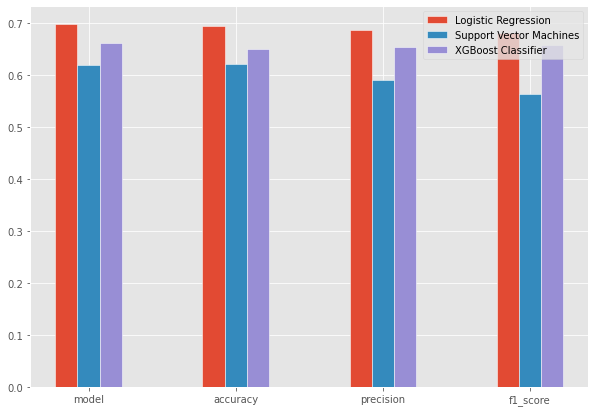

In [185]:
import numpy as np

metrics_after_FS = pd.DataFrame(metrics)
metrics_after_FS = metrics_after_FS.T.reset_index().rename(columns={'index': 'model'})

barWidth = 0.15
    
# set heights of bars
bars1 = metrics_after_FS[metrics_after_FS.model == metrics_after_FS.model[0]].drop('model', axis=1).T[0].values
bars2 = metrics_after_FS[metrics_after_FS.model == metrics_after_FS.model[1]].drop('model', axis=1).T[1].values
bars3 = metrics_after_FS[metrics_after_FS.model == metrics_after_FS.model[2]].drop('model', axis=1).T[2].values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.figure(figsize=(10, 7))

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label=metrics_after_FS['model'][0])
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label=metrics_after_FS['model'][1])
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label=metrics_after_FS['model'][2])

plt.xticks([r + barWidth for r in range(len(bars2))], list(metrics_after_FS.columns[:-1]))
# Create legend & Show graphic
plt.legend()
plt.show()

In [186]:
metrics_after_FS.to_csv('metrics_new.csv')

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from run_predictions import fit_predict, evaluate_model, get_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from lightgbm import LGBMClassifier
import time
import logging

dataset_1 = features_eth
# solver='lbfgs', C=0.01, penalty='l2'
models = {
            'Logistic Regression': LogisticRegression(), 
            'Support Vector Machines': SVC(), 
            'XGBoost Classifier': XGBClassifier()
        }

predictions = {}
train_time = {}
train_accuracies = {}

train_period = 30
test_period = 3


for model in models:
    start = time.time()

    print('Running predictions for {model}'.format(model=model))

    predictions[model], train_accuracies[model] = fit_predict(
        models[model], dataset_1, outcomes_eth['direction_1'], train_period=train_period, test_period=test_period)
    
    end = time.time()

    logging.info('Time taken to train model {model} for train period {train_period} and test period {test_period}: {time_taken}'.format(model=model, train_period=train_period, test_period=test_period, time_taken=end-start))
    train_time[index] = end - start


metrics = {}
cm = {}

for model in predictions:
    y_true = outcomes_eth.set_index('date')['direction_1'].loc[predictions[model].index]
    print('Evaluating model {model}'.format(model=model))
    metrics[model] = evaluate_model(y_true=y_true, y_pred=list(predictions[model]))
    cm[model] = get_confusion_matrix(y_true=y_true, y_pred=list(predictions[model]))

metrics
# pd.DataFrame(metrics).to_csv('metrics_dataset1_15Aug.csv')
# pd.DataFrame(train_accuracies).to_csv('train_accuracies_dataset1_15Aug.csv')


In [27]:
predictions

{'Logistic Regression': date
 2015-11-05    0.0
 2015-11-06    1.0
 2015-11-07    1.0
 2015-11-08    1.0
 2015-11-09    1.0
              ... 
 2022-08-04    0.0
 2022-08-05    1.0
 2022-08-06    0.0
 2022-08-07    0.0
 2022-08-08    1.0
 Length: 2469, dtype: object,
 'Support Vector Machines': date
 2015-11-05    0.0
 2015-11-06    1.0
 2015-11-07    0.0
 2015-11-08    0.0
 2015-11-09    0.0
              ... 
 2022-08-04    0.0
 2022-08-05    1.0
 2022-08-06    0.0
 2022-08-07    0.0
 2022-08-08    1.0
 Length: 2469, dtype: object,
 'XGBoost Classifier': date
 2015-11-05    0
 2015-11-06    1
 2015-11-07    1
 2015-11-08    0
 2015-11-09    1
              ..
 2022-08-04    0
 2022-08-05    1
 2022-08-06    0
 2022-08-07    0
 2022-08-08    1
 Length: 2469, dtype: object}

## *Visualise Confusion matrix*

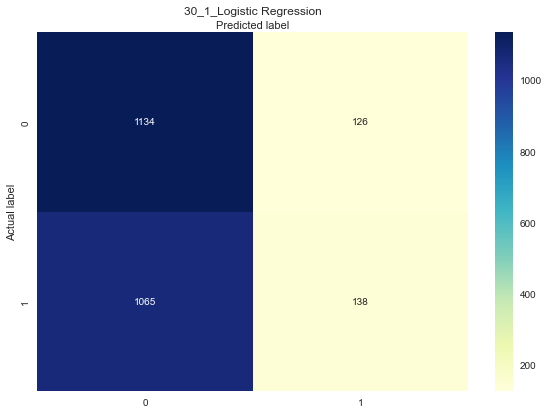

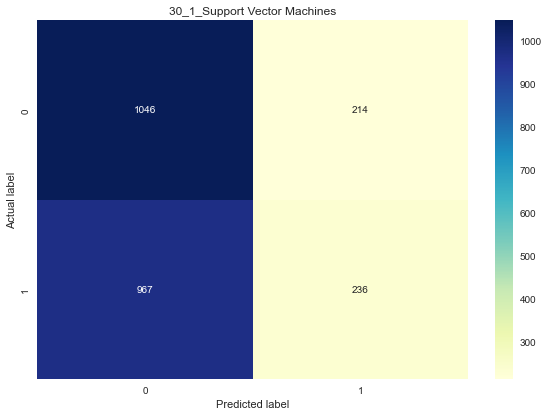

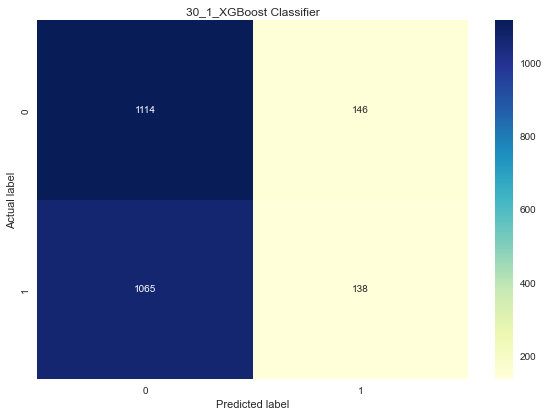

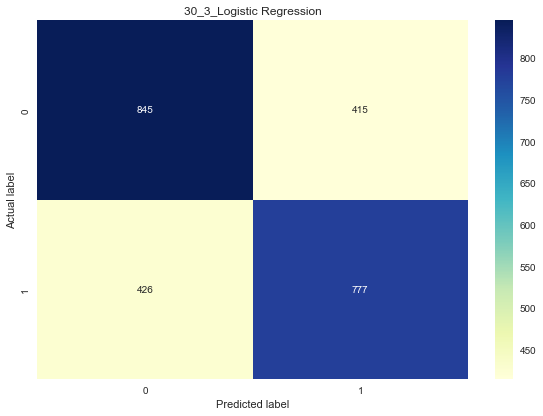

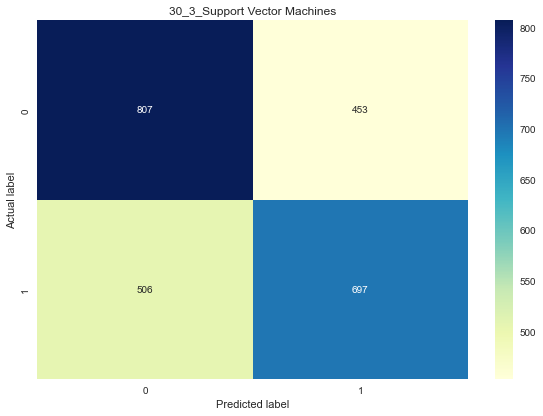

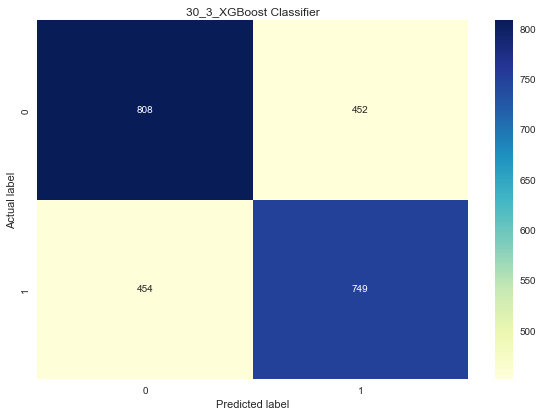

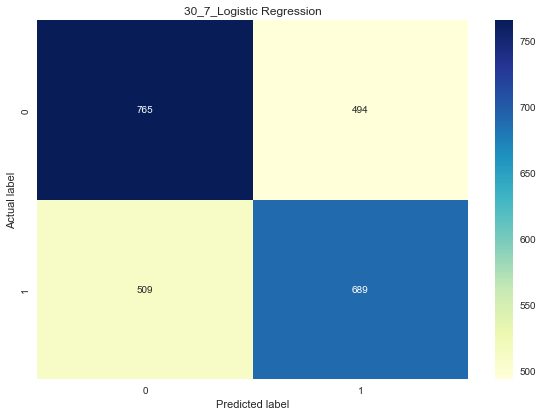

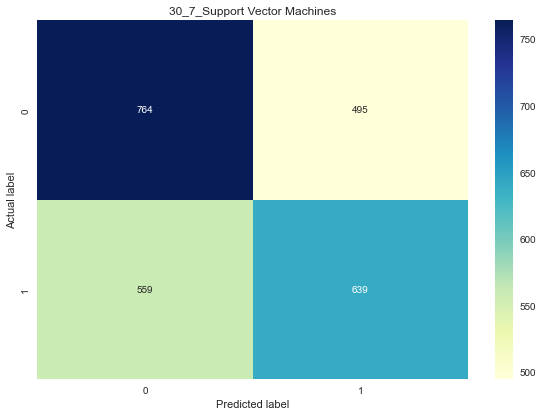

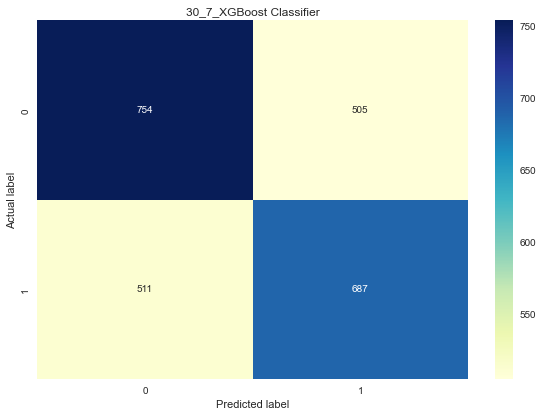

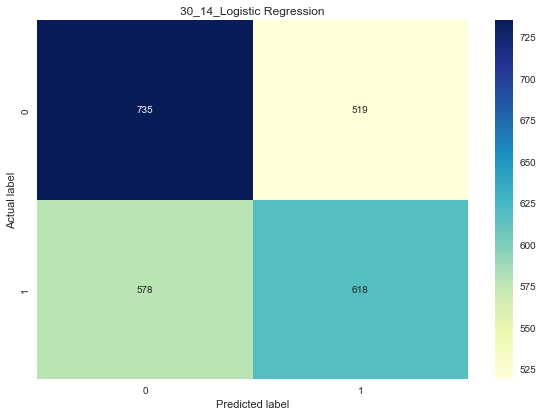

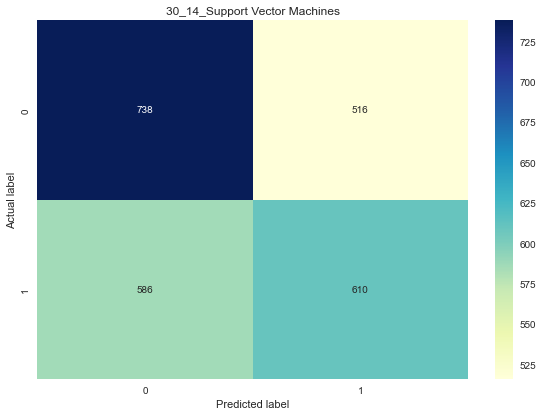

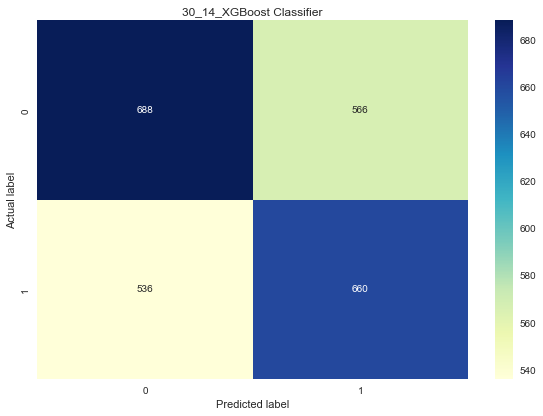

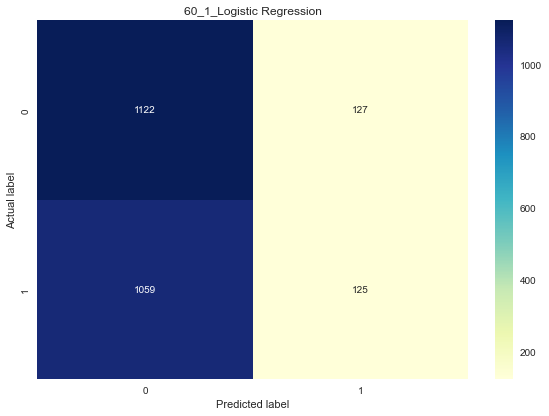

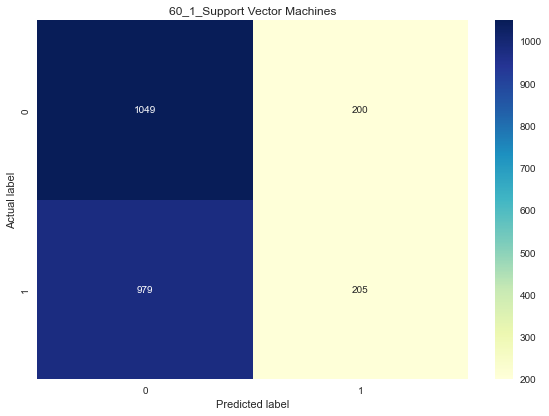

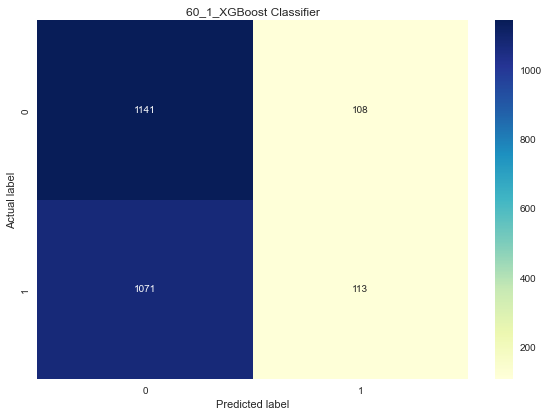

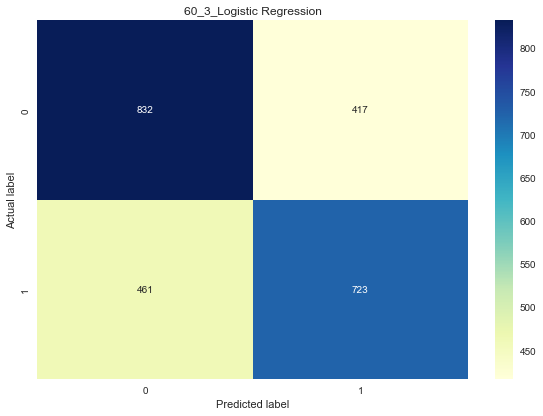

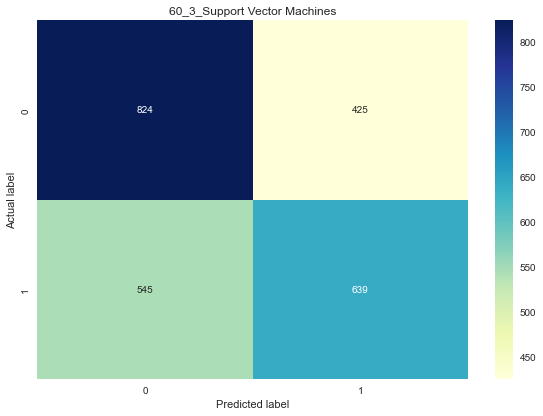

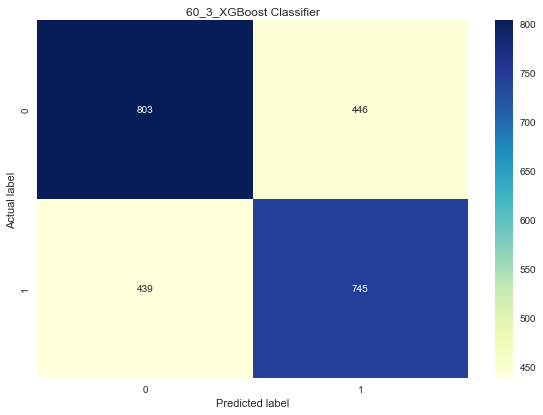

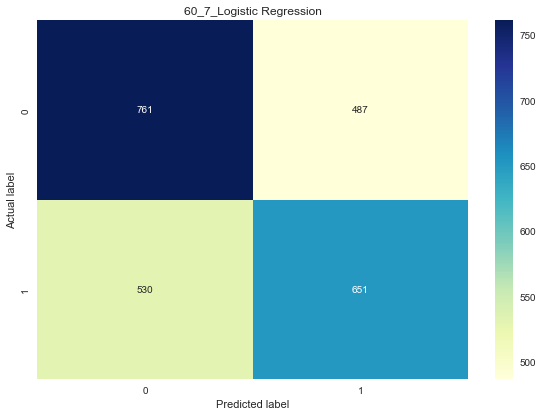

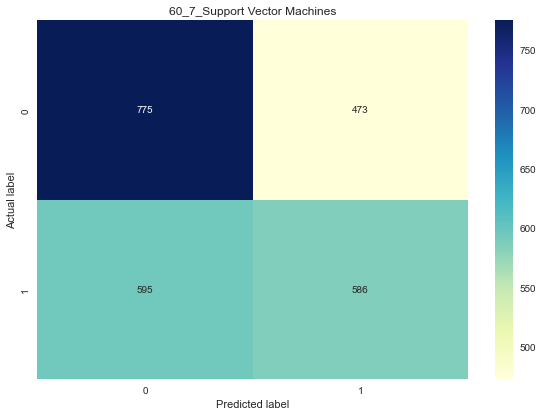

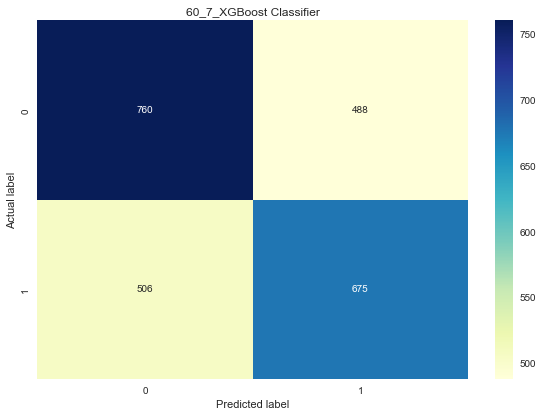

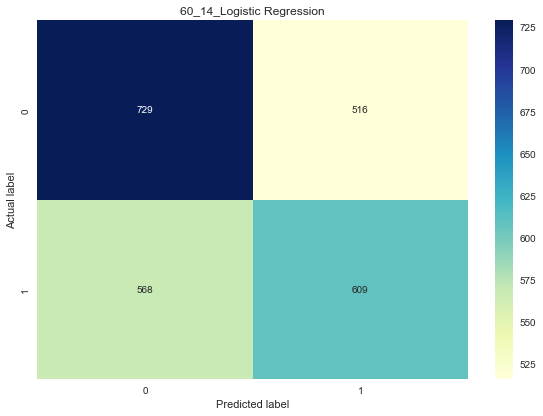

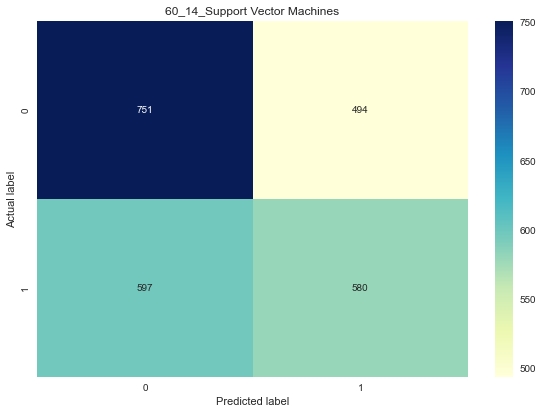

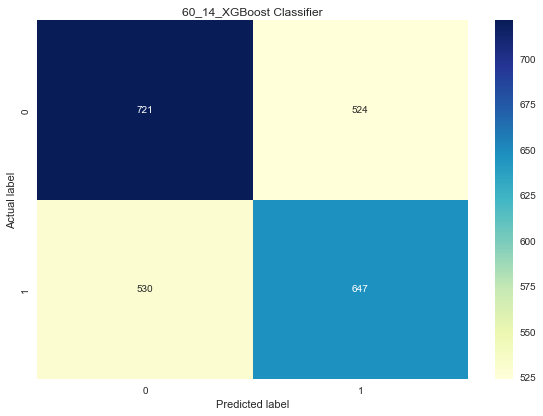

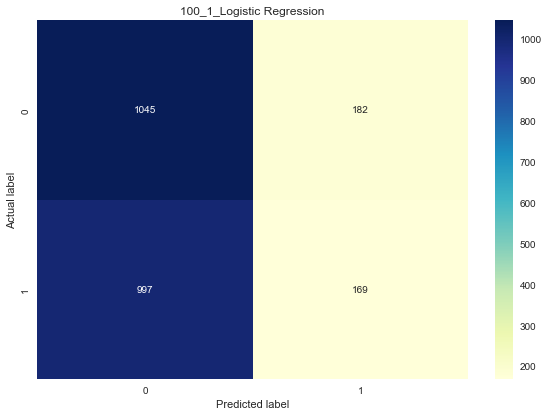

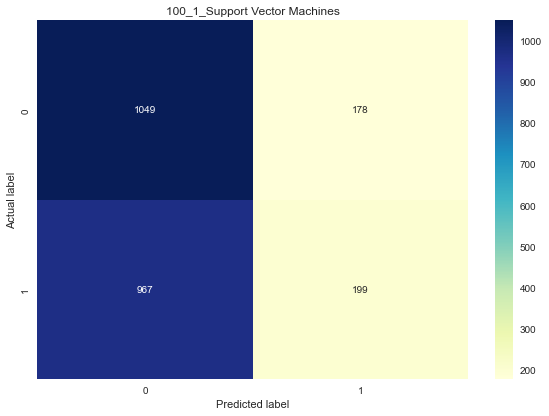

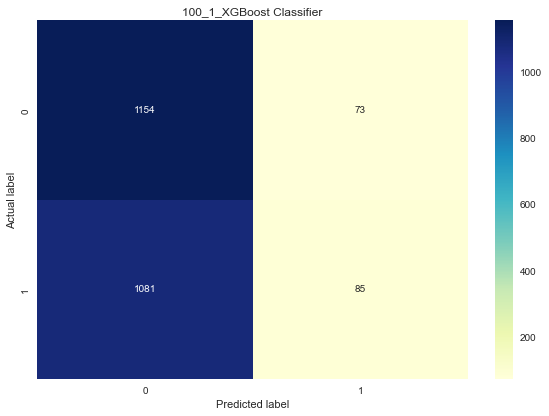

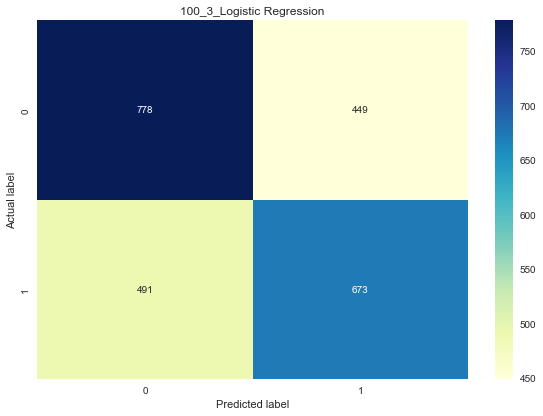

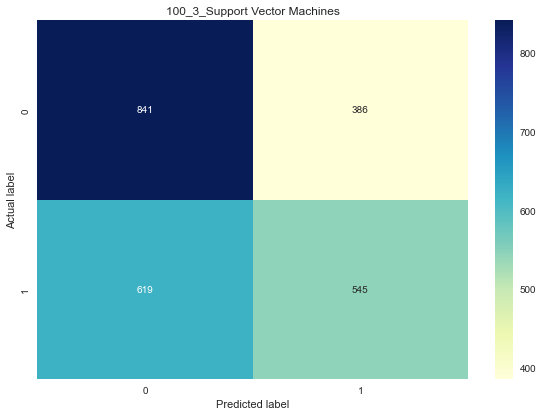

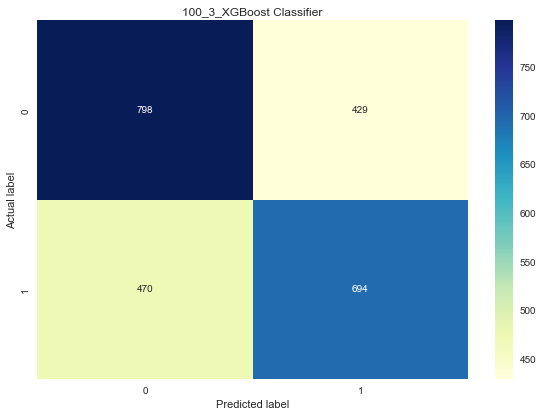

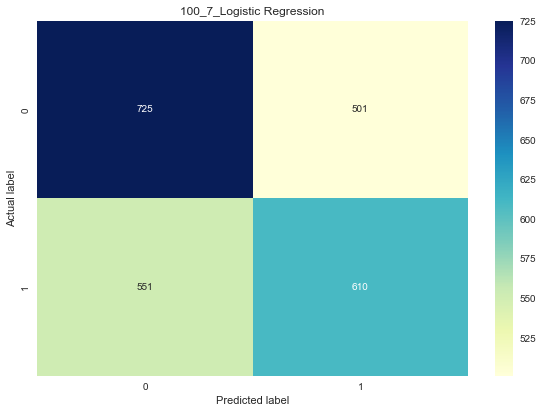

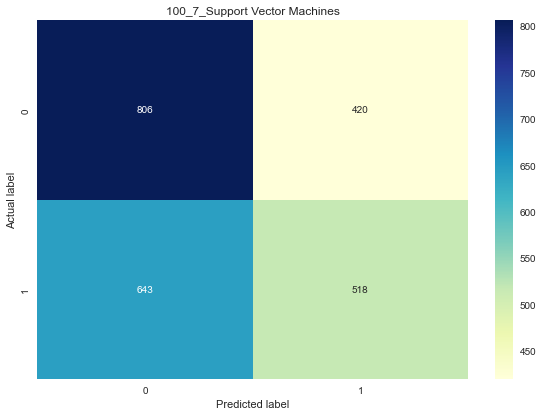

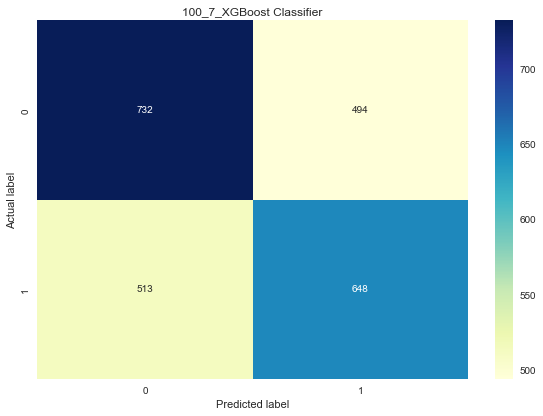

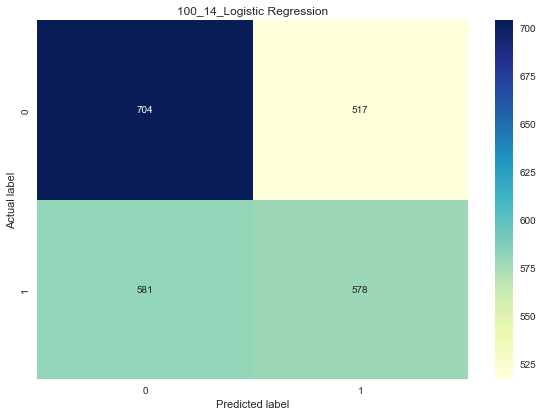

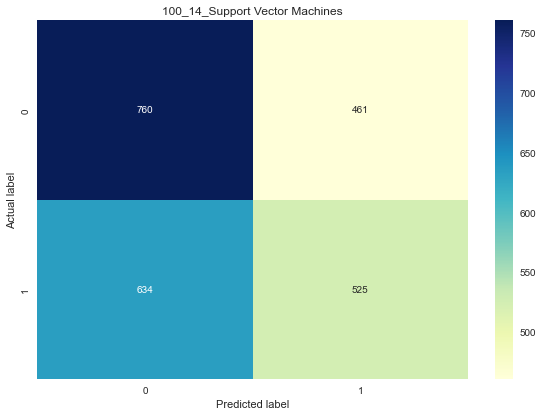

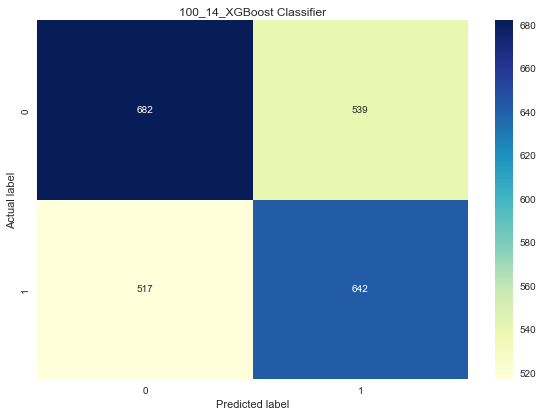

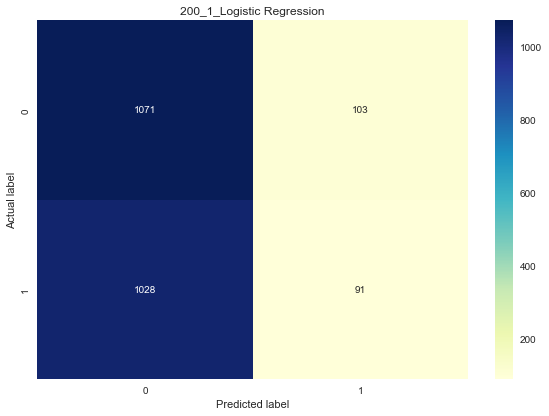

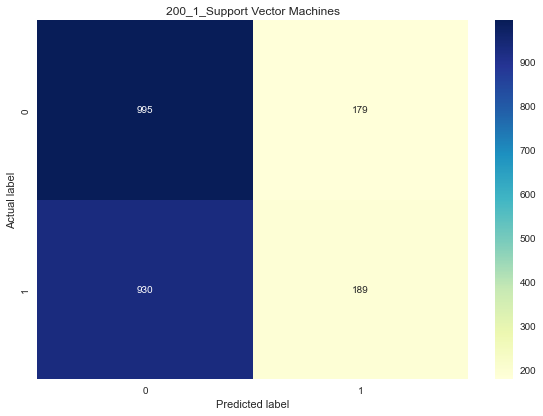

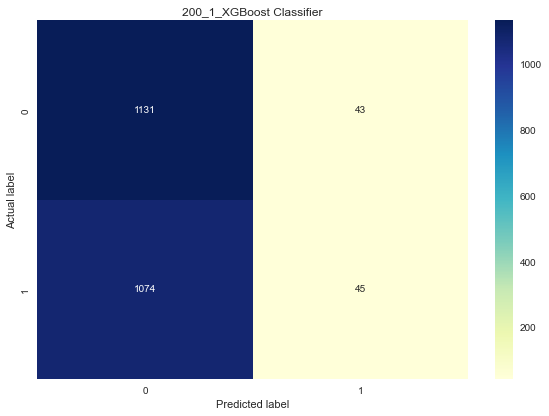

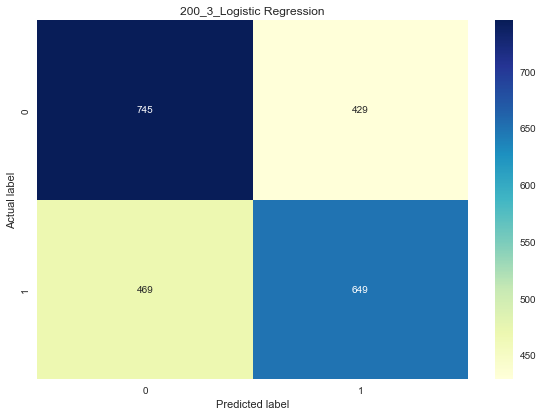

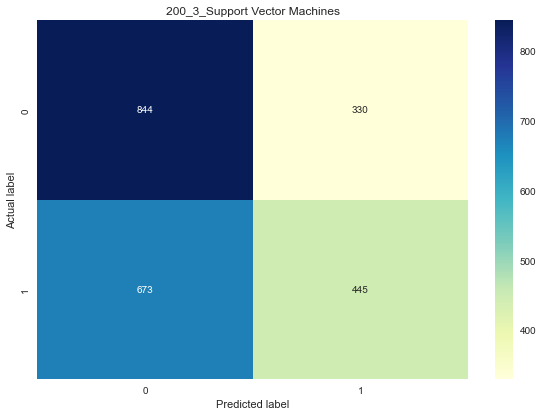

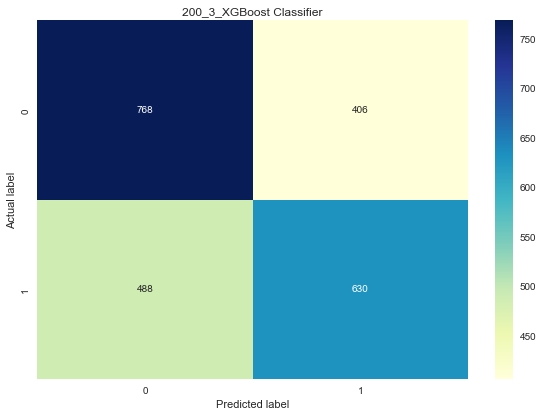

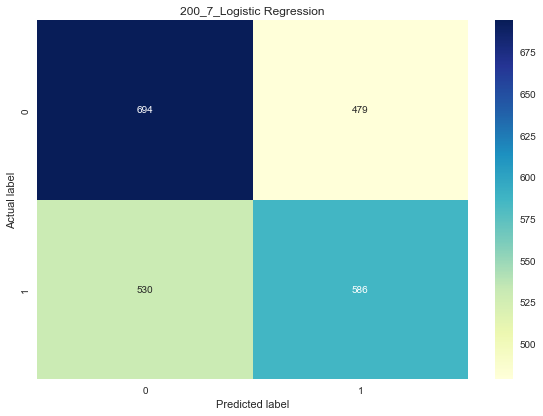

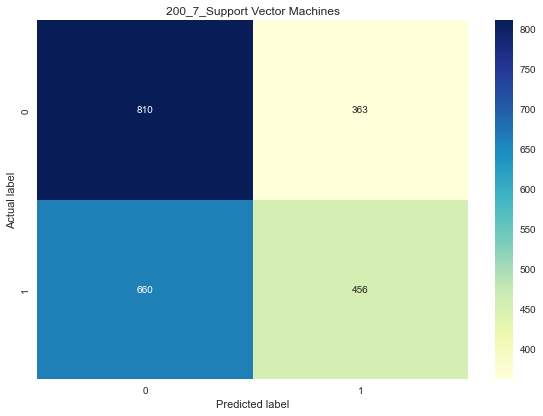

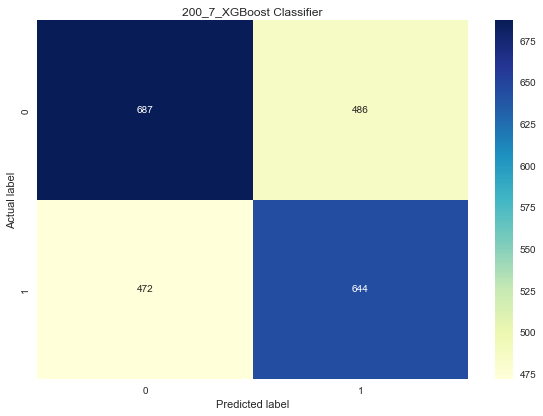

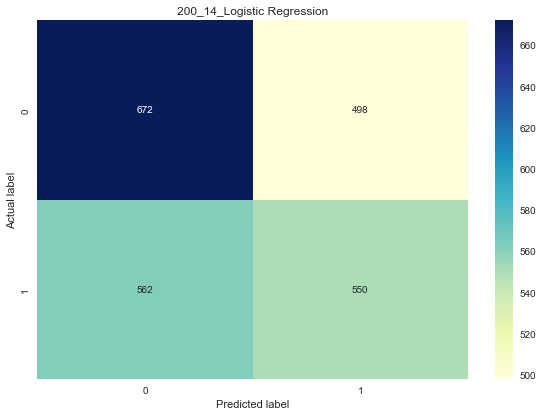

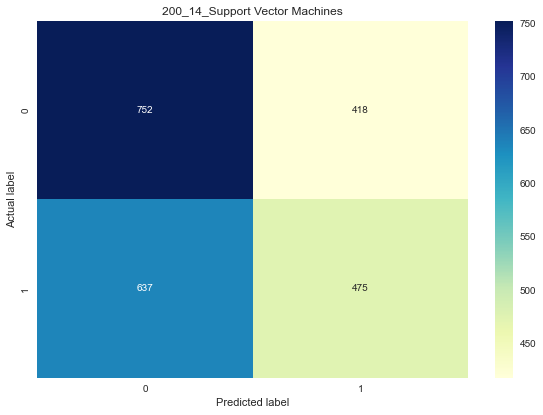

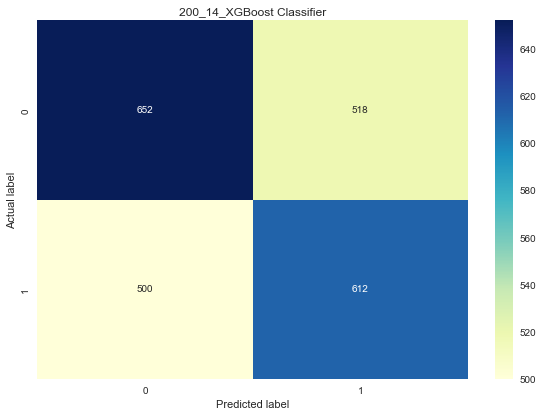

In [23]:
# Visualise confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
class_names=['UP', 'DOWN'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

for i in cm:
# create heatmap
    sns.heatmap(pd.DataFrame(cm[i]), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(i)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()